In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
#% matplotlib inline

In [ ]:
data = [[1,2],[3,4]]
tensor_data = torch.tensor(data)
print("The data type is {} \n{}".format(type(tensor_data),tensor_data))

The data type is <class 'torch.Tensor'> 
tensor([[1, 2],
        [3, 4]])


In [ ]:
data = np.arange(0,10,dtype='float32')
print(data)
tensor_data = torch.from_numpy(data)
print("The data type is {} \n{}".format(type(tensor_data),tensor_data))
data_back = tensor_data.numpy()
print("The data type is {} \n{}".format(type(data_back),data_back))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
The data type is <class 'torch.Tensor'> 
tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
The data type is <class 'numpy.ndarray'> 
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
tensor_data = torch.rand(size= (3,4)).to('cuda')
# check shape
# check data type/dtype
# check device

print ("The tensor size is: {} \nIt is on: {} \nIt is of type: {}".format(tensor_data.shape, tensor_data.device, tensor_data.dtype))

if torch.cuda.is_available():
  tensor_data.to('cuda')
  print ("\nTransfer to GPU! \nThe tensor size is: {} \nit is on: {} \nit is of type: {}".format(tensor_data.shape, tensor_data.device, tensor_data.dtype))

The tensor size is: torch.Size([3, 4]) 
It is on: cuda:0 
It is of type: torch.float32

Transfer to GPU! 
The tensor size is: torch.Size([3, 4]) 
it is on: cuda:0 
it is of type: torch.float32


In [ ]:
#? Check if CUDA is available
torch.cuda.is_available()

True

In [ ]:
tensor_d = torch.arange(0, 9, dtype=torch.float)
print(tensor_data)
print(tensor_data.shape)

tensor([[0.0910, 0.1444, 0.2490, 0.7955],
        [0.2709, 0.8079, 0.4945, 0.7855],
        [0.6374, 0.0223, 0.7869, 0.4647]], device='cuda:0')
torch.Size([3, 4])


In [ ]:
tensor_d_2d = tensor_d.view(3,3)
print(tensor_d_2d)
print(tensor_d_2d.shape)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
torch.Size([3, 3])


In [ ]:
data_unsqueeze = tensor_d.unsqueeze(1)
print(data_unsqueeze)
print(data_unsqueeze.shape)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]])
torch.Size([9, 1])


In [ ]:
data_queezed = data_unsqueeze.squeeze()
print(data_queezed)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.])


In [ ]:
concat_tensor =torch.cat((tensor_d,tensor_d))
print(concat_tensor)

print(torch.stack((tensor_d,tensor_d)))

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 0., 1., 2., 3., 4., 5., 6., 7., 8.])
tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8.],
        [0., 1., 2., 3., 4., 5., 6., 7., 8.]])


In [ ]:
product_tensor = tensor_d*tensor_d
print(product_tensor)
print(product_tensor.shape)

tensor([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64.])
torch.Size([9])


In [ ]:
tensor_multiply =torch.arange(0,6, dtype =torch.float).view(2,3)

product_tensor = torch.matmul(tensor_multiply,tensor_multiply.T)

print(tensor_multiply)
print(tensor_multiply.T)
print(product_tensor)

tensor([[0., 1., 2.],
        [3., 4., 5.]])
tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])
tensor([[ 5., 14.],
        [14., 50.]])


In [ ]:
def fx(x):
  y = 5*x + 1
  return y

In [ ]:
x_values = torch.linspace(-1,1,1000).unsqueeze(1)

y_values = fx(x_values)
print(x_values.shape)
print(y_values.shape)

torch.Size([1000, 1])
torch.Size([1000, 1])


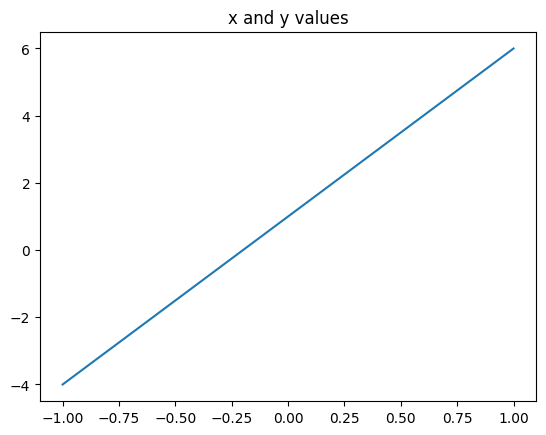

In [ ]:
plt.plot(x_values, y_values)
plt.title("x and y values")
plt.show()

In [ ]:
model = torch.nn.Sequential(
                            torch.nn.Linear(1,2),
                            torch.nn.Linear(2,1)
                            )
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=1, bias=True)
)


In [ ]:
loss_f = torch.nn.MSELoss()

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate )

In [ ]:
def check_progress(i, ax, model):
  x_test = torch.arange(-2., 2., 0.01).view(-1,1)
  y_test = fx(x_test)

  with torch.no_grad():
    predicted = model(x_test)

  ax.plot(x_test, y_test, c = 'red')
  ax.plot(x_test, predicted, c = 'green')
  ax.axis("off")
  ax.axis('equal')
  ax.set_xlim(-5,5)
  ax.set_ylim(-5,5)
  ax.set_title("iteration {}".format(i), color= 'white')
  return ax

In [ ]:
def plot_trace(i, loss, x_values, y_values, y_pred):
  title = ("The loss value at step #{} is: {:2f}".format(i, loss))
  plt.plot(x_values, y_values, c= 'red')
  plt.plot(x_values, y_pred.detach().cpu(), c='green')
  clear_output()
  plt.title(title)
  plt.axis("off")
  plt.show()
  time.sleep(1)

Loss valie in 0th iteration is :8.04747486114502
Loss valie in 10th iteration is :2.414358377456665
Loss valie in 20th iteration is :0.8385096192359924
Loss valie in 30th iteration is :0.23851250112056732
Loss valie in 40th iteration is :0.05519216135144234
Loss valie in 50th iteration is :0.010704641230404377
Loss valie in 60th iteration is :0.0017953035421669483
Loss valie in 70th iteration is :0.0002656795550137758
Loss valie in 80th iteration is :3.499684316921048e-05
Loss valie in 90th iteration is :4.10595748689957e-06


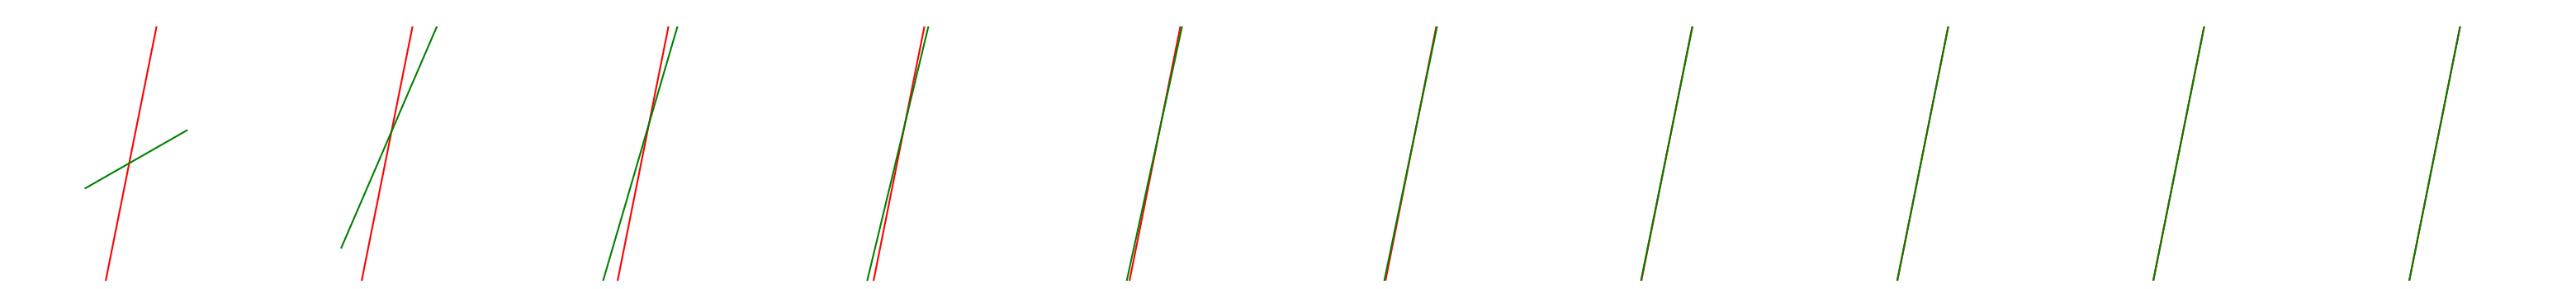

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=10,
                         gridspec_kw={'wspace':0, 'hspace':0},
                         squeeze=True)
fig.set_figheight(4)
fig.set_figwidth(40)

for i in range (100):
  y_pred = model(x_values)

  loss = loss_f(y_values,y_pred)

  step = 10

  if i%step == 0:
    print("Loss valie in {}th iteration is :{}".format(i,loss))

    ax = axis[i//step]
    axis[i//step] = check_progress(i,ax,model)


  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.show()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def check_progress(i, ax, model):
  x = torch.linspace(-np.pi, np.pi, 1000)
  y = fx(x)

  # Prepare the input tensor (x, x^2, x^3).
  p = torch.tensor([1, 2, 3])
  xx = x.unsqueeze(-1).pow(p)

  with torch.no_grad():
    predicted = model(xx)

  ax.plot(x, y, c = 'red')
  ax.plot(x, predicted, c = 'green')
  ax.set_xlim(-4,4)
  ax.set_ylim(-2,2)
  ax.axis("off")
  ax.set_title("iteration {}".format(i), color= 'black')
  if (i == 0):
    ax.legend(["sin(x)", "Prediction"])
  return ax


In [ ]:
# define the fx as sin function
def fx(x_values):
  y = torch.sin(x_values)
  return y

In [ ]:
x = torch.linspace(-np.pi,np.pi,1000)
y = fx(x)

print(x.shape)

torch.Size([1000])


In [ ]:
p = torch.tensor([1,2,3])
print(p.shape)
xx = x.unsqueeze(-1).pow(p)
print( x.shape, xx.shape)

torch.Size([3])
torch.Size([1000]) torch.Size([1000, 3])


In [ ]:
model = torch.nn.Sequential(
                             torch.nn.Linear(3,1),
                             torch.nn.Flatten(0,1),
                            )

print(model)

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
)


In [ ]:
loss_function = torch.nn.MSELoss(reduction = "mean")
learning_rate = 0.001 # 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate)

Loss value in 0th iteration is: 57.5324592590332
Loss value in 200th iteration is: 13.580122947692871
Loss value in 400th iteration is: 3.0077319145202637
Loss value in 600th iteration is: 0.2892415225505829
Loss value in 800th iteration is: 0.11724234372377396
Loss value in 1000th iteration is: 0.08543765544891357
Loss value in 1200th iteration is: 0.04395557567477226
Loss value in 1400th iteration is: 0.01496431790292263
Loss value in 1600th iteration is: 0.0052343085408210754
Loss value in 1800th iteration is: 0.00468457629904151
Loss value in 2000th iteration is: 0.004439238458871841


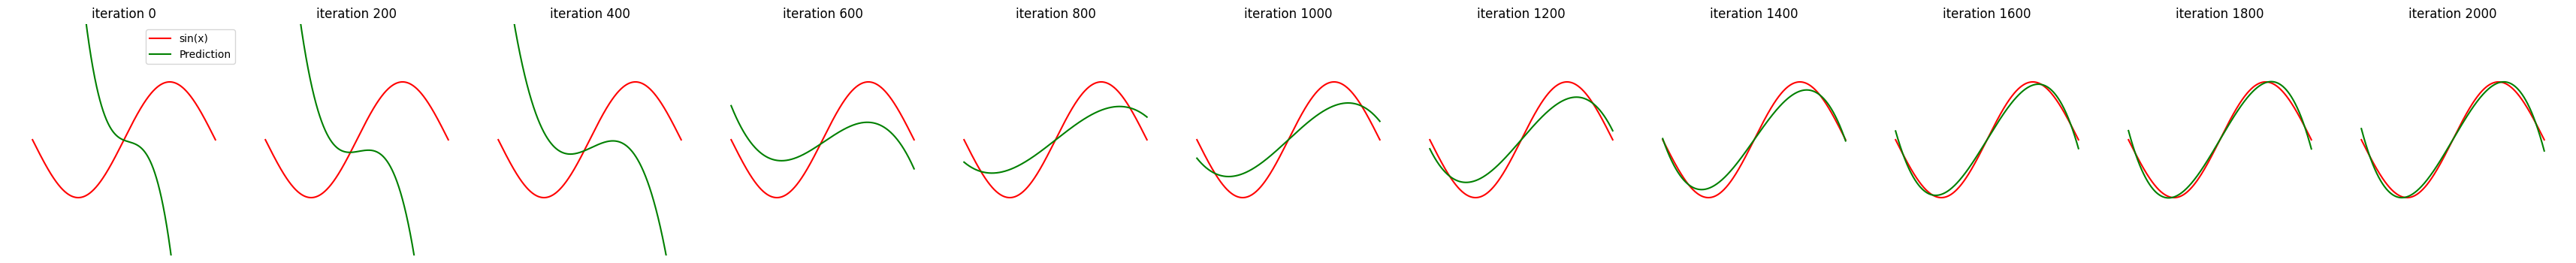

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=11,
                         gridspec_kw={'wspace':0, 'hspace':0},
                         squeeze=True)
fig.set_figheight(4)
fig.set_figwidth(44)

step = 200

for i in range(2001):
  # first we pass the data through the model
  y_pred = model(xx)
  # calculate loss
  loss = loss_function(y_pred, y)

  if (i%step == 0):
    print ("Loss value in {}th iteration is: {}".format(i, loss.item()))
    ax = axis[i//step]
    axis[i//step] =  check_progress(i,ax,model)

  # we first freeze the gradient,
  optimizer.zero_grad()
  # then calculate the backward gradient of loss with respect to all the parameters!!
  loss.backward()
  # then the optimizer steps in and does its magic!
  optimizer.step()

In [ ]:
par = [layer for layer in model.modules()]
print (par)
print (par[1].weight)

[Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
  (1): Flatten(start_dim=0, end_dim=1)
), Linear(in_features=3, out_features=1, bias=True), Flatten(start_dim=0, end_dim=1)]
Parameter containing:
tensor([[ 8.5626e-01, -3.9569e-09, -9.3559e-02]], requires_grad=True)
